In [48]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD as TSVD
from sklearn.manifold import TSNE
import os
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

from sklearn.preprocessing import StandardScaler, RobustScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import hdbscan
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
# load dataset

train = os.path.join('/home/tom/IdeaProjects/UTSCProjects/Three Planets With False Positives/TESS_simulated_lc_small.csv')

dataset = pd.read_csv(train, header=0, index_col=0)
dataset = dataset.reset_index()

Y = dataset['Ids']
X = dataset.iloc[0:, 1:]

plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

tsvd = TSVD(n_components=50, n_iter=10000, algorithm='arpack')

tsne_2d = TSNE(n_components=2, n_iter=100000, n_iter_without_progress=1000, metric='manhattan',
            method='exact', learning_rate=1000)

tsne_3d = TSNE(n_components=3, n_iter=100000, n_iter_without_progress=1000, metric='manhattan',
            method='exact', learning_rate=800)

D3_reduction = tsne_3d.fit_transform(tsvd.fit_transform(X))

D2_reduction = tsne_2d.fit_transform(D3_reduction)

<IPython.core.display.Javascript object>


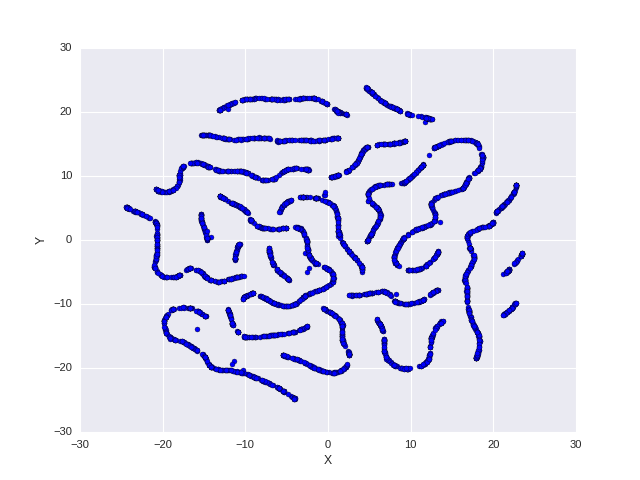

In [56]:
x = []
y = []

for points in D2_reduction:
    x.append(points[0])
    y.append(points[1])

fig = plt.figure()

ax = fig.add_subplot(111)

ax.scatter(D2_reduction.T[0], D2_reduction.T[1])

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

<IPython.core.display.Javascript object>


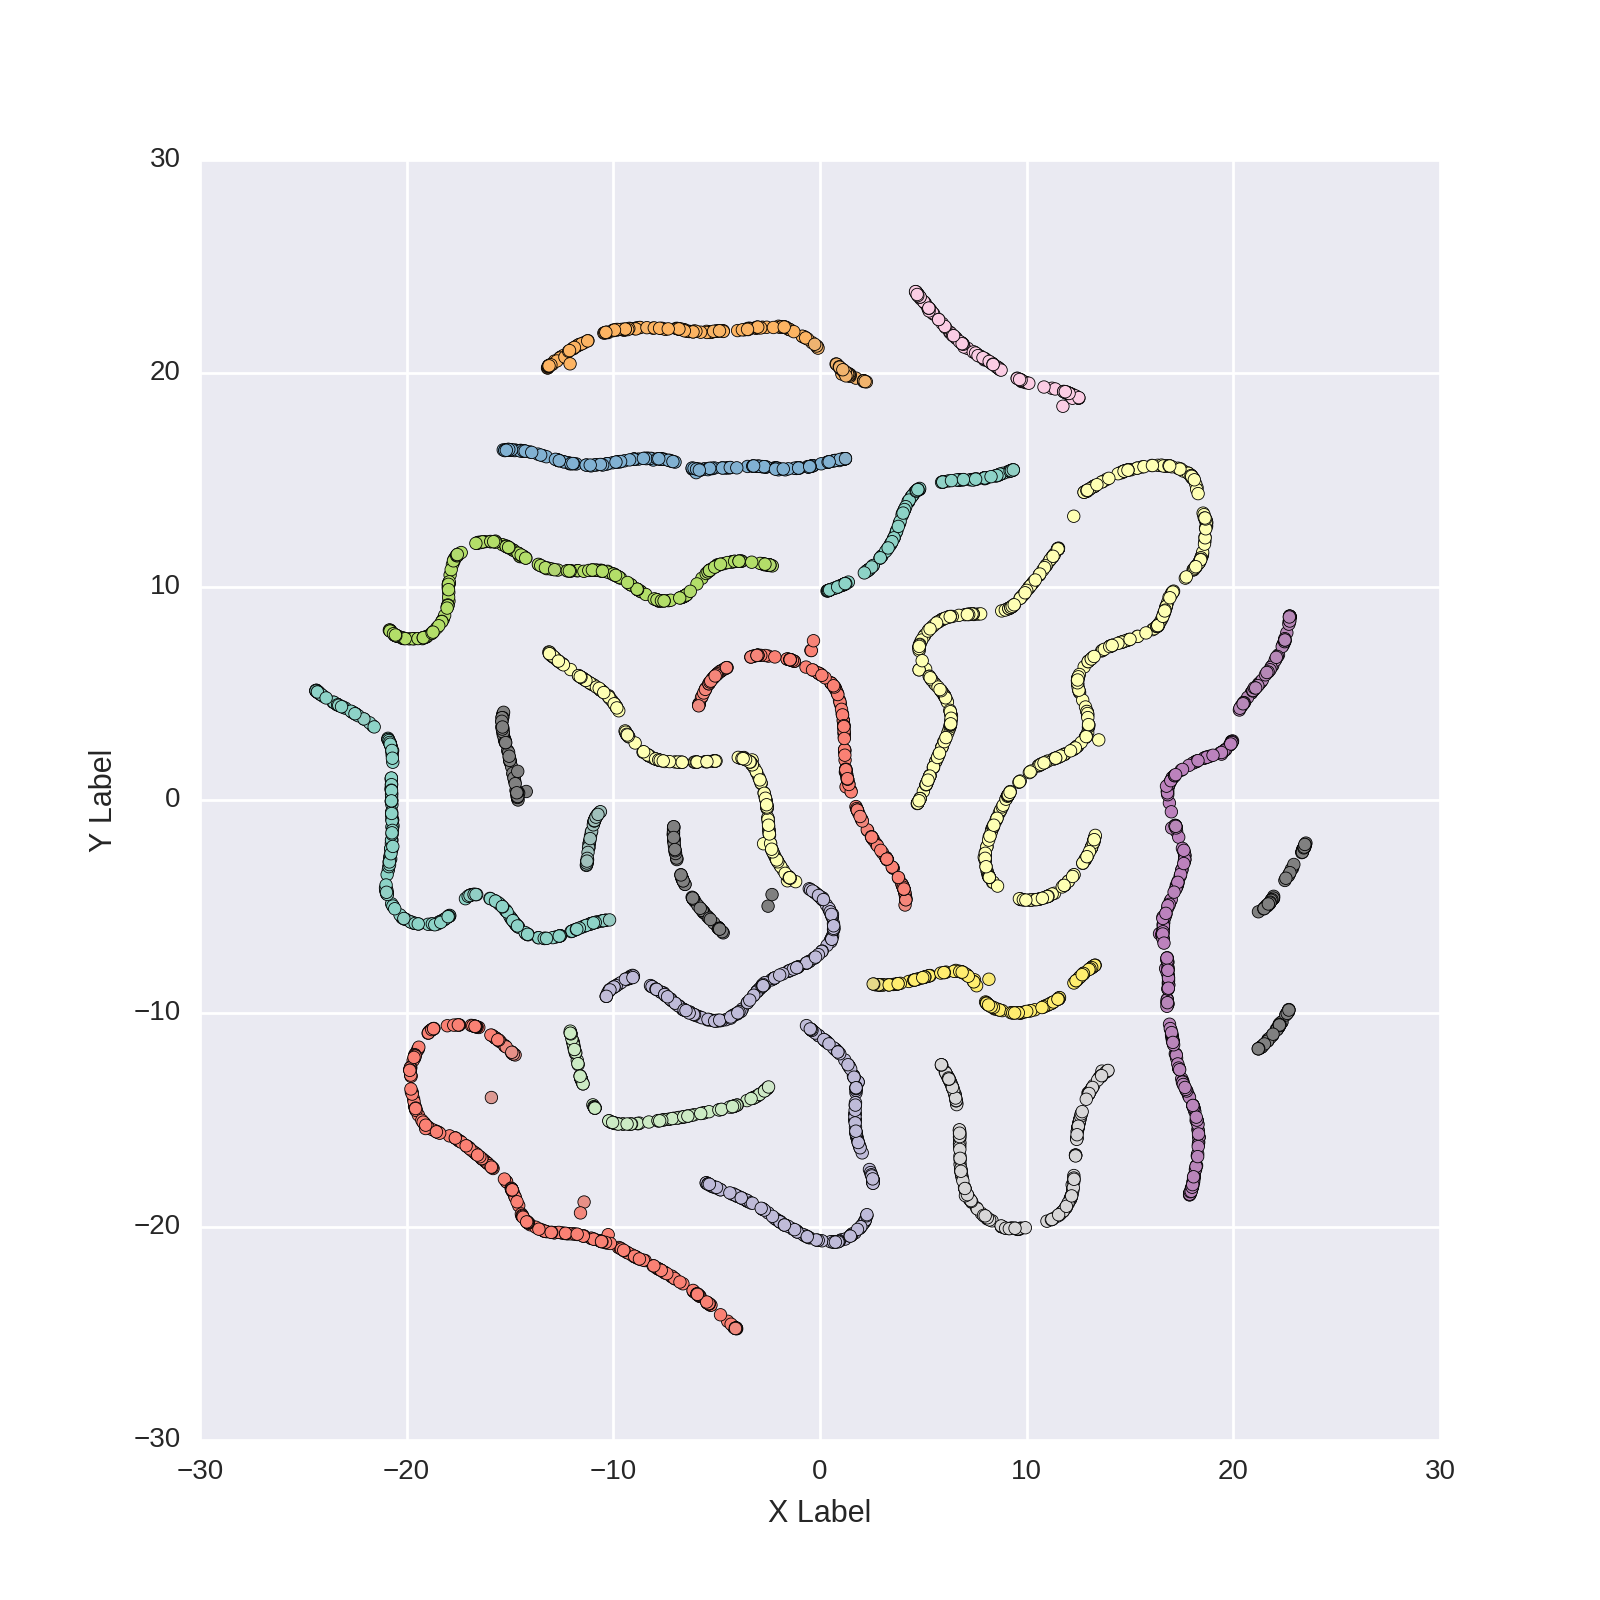

found 16 clusters


In [57]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 125, min_samples=23).fit(D2_reduction)

n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)


palette = sns.color_palette('Set3', n_colors=n_clusters_)

cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (.5, .5, .5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

fig = plt.figure(figsize=(8,8), dpi=200)

ax = fig.add_subplot(111)

ax.scatter(x, y, c=cluster_colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

print 'found {0} clusters'.format(n_clusters_)

plt.show()

<IPython.core.display.Javascript object>


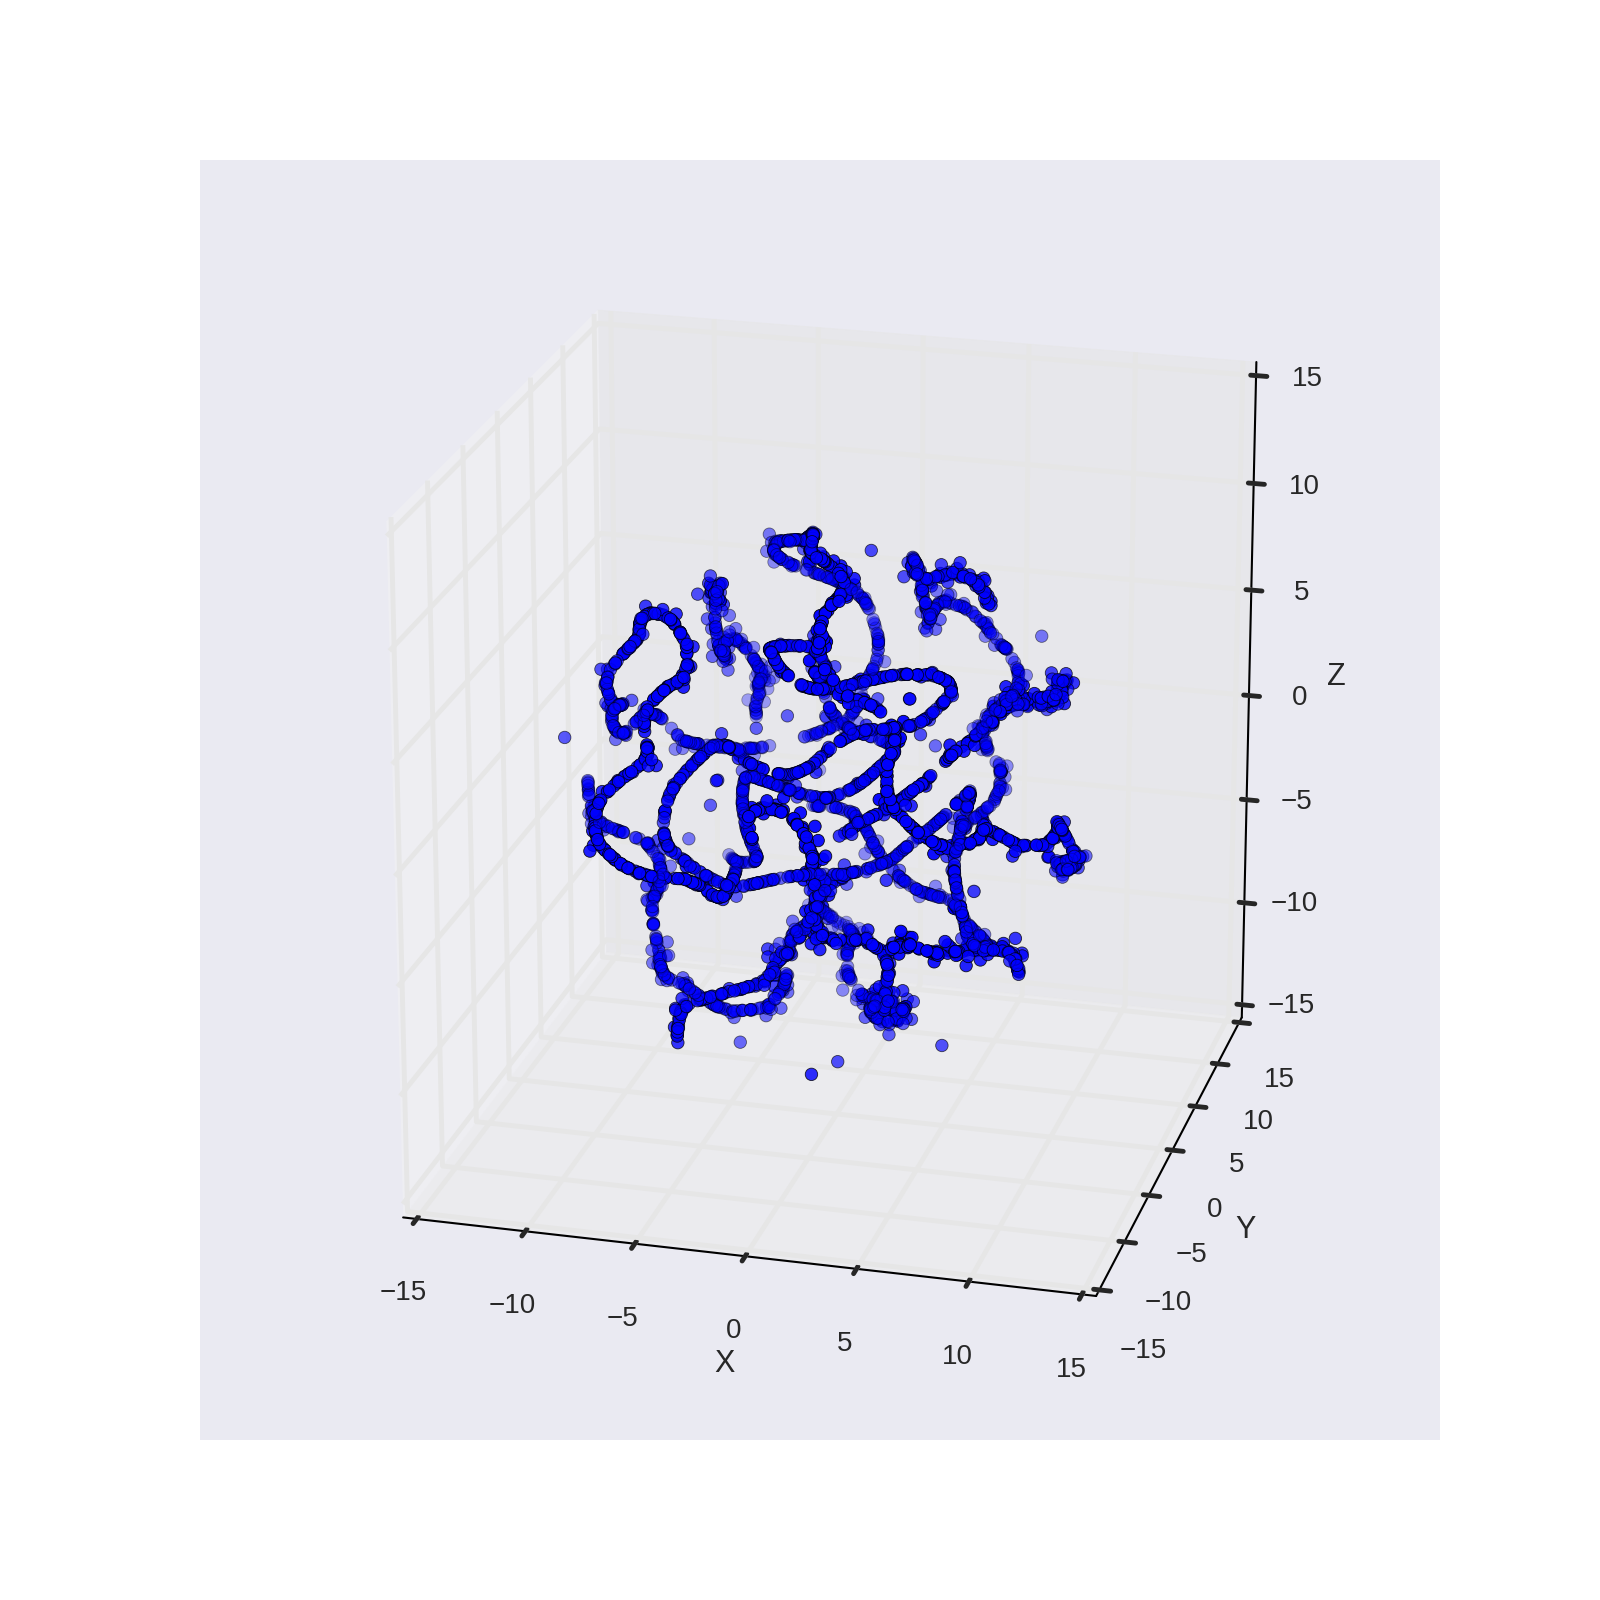

In [58]:
x=[]
y=[]
z=[]

for points in D3_reduction:
    x.append(points[0])
    y.append(points[1])
    z.append(points[2])

fig = plt.figure(figsize=(8,8), dpi=200)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(D3_reduction.T[0], D3_reduction.T[1], D3_reduction.T[2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


<IPython.core.display.Javascript object>


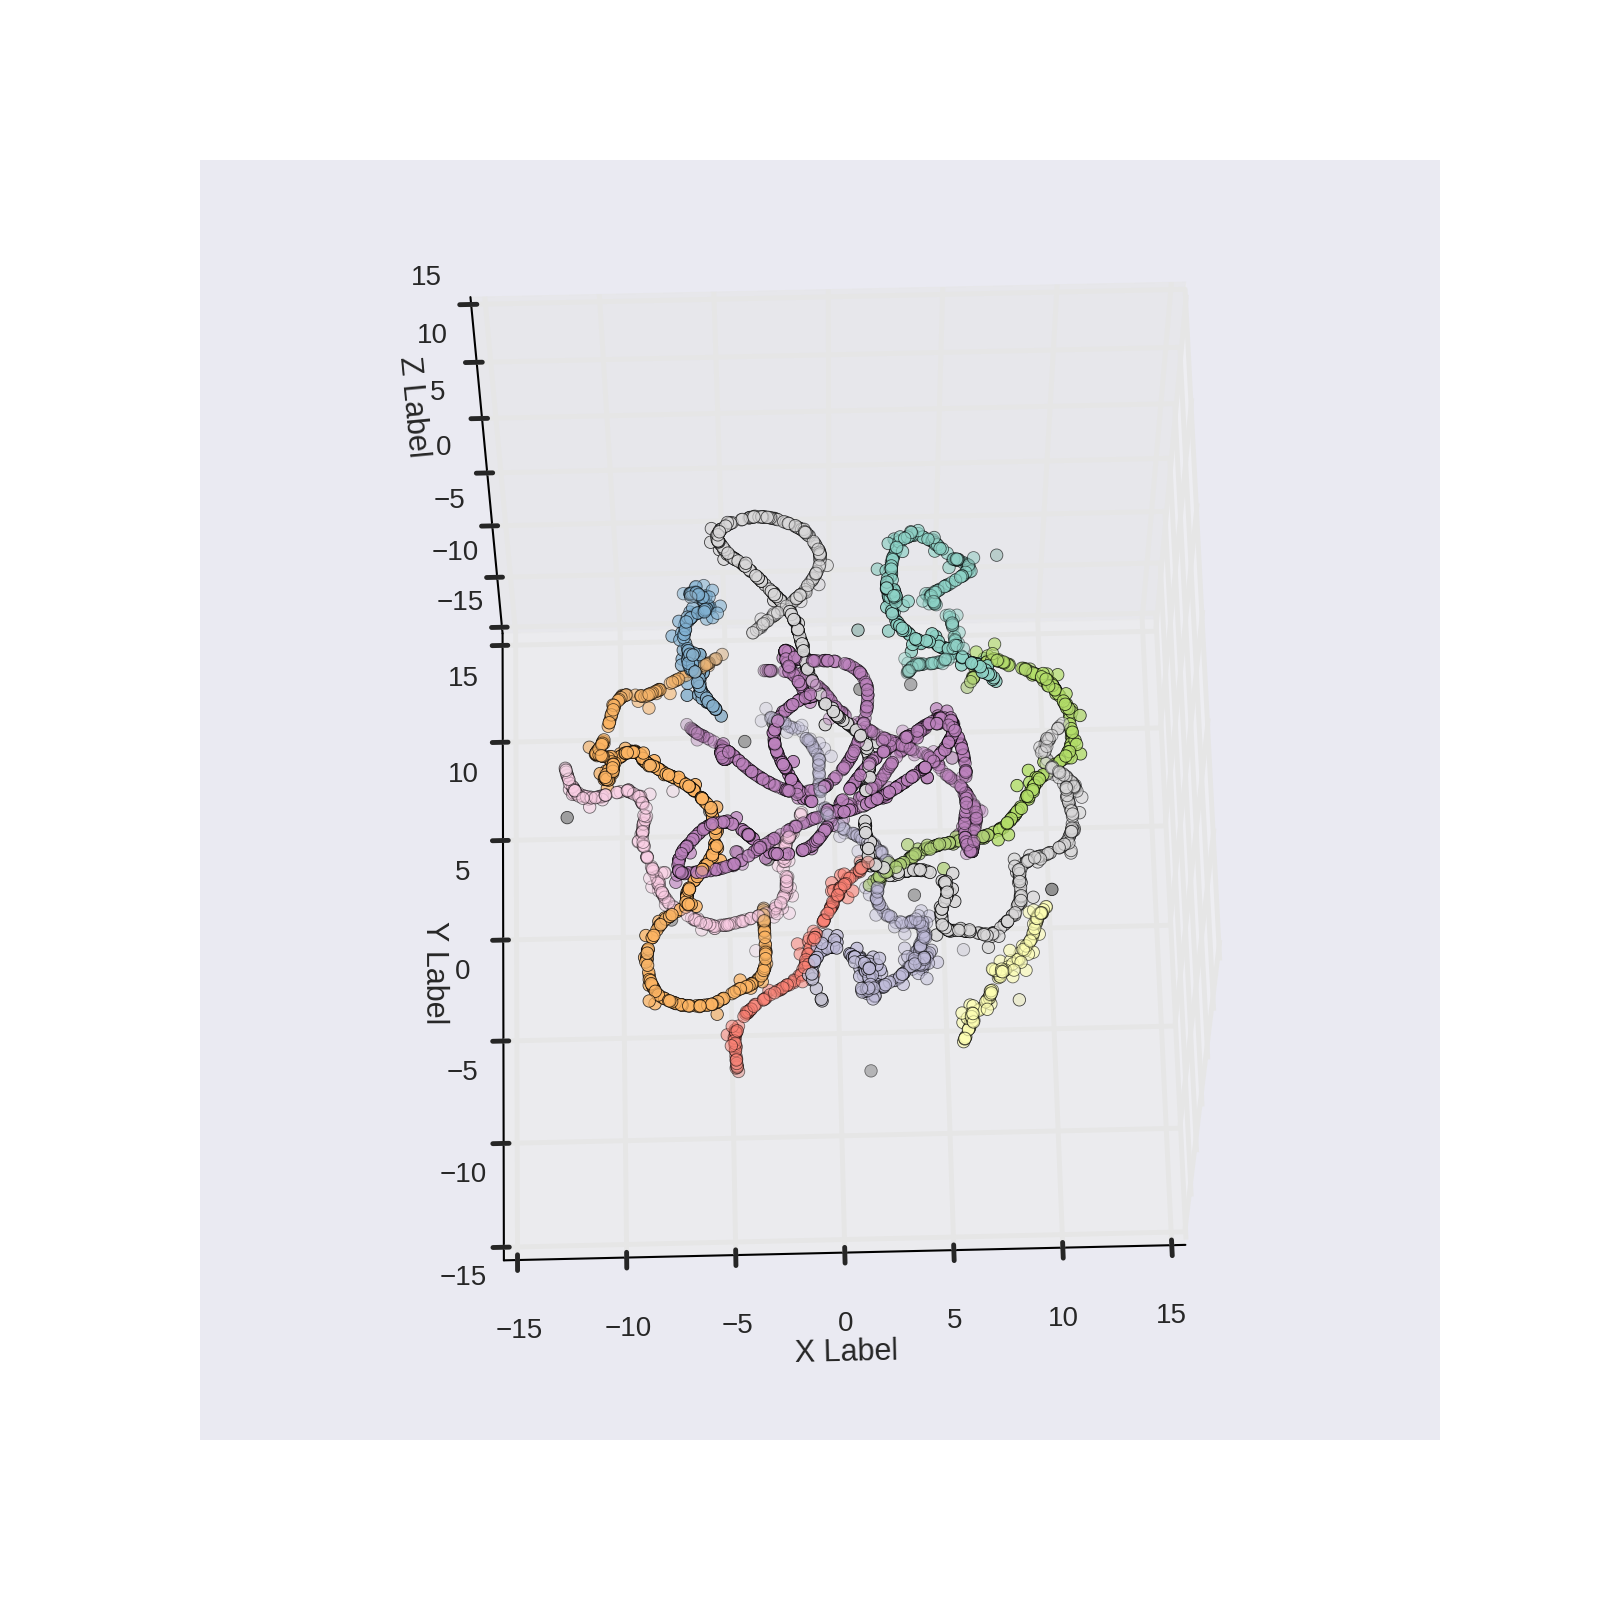

found 10 clusters


In [60]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 118, min_samples=23).fit(D3_reduction)

n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)


palette = sns.color_palette('Set3', n_colors=n_clusters_)

cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (.5, .5, .5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(D3_reduction.T[0], D3_reduction.T[1], D3_reduction.T[2], c=cluster_colors)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

print 'found {0} clusters'.format(n_clusters_)

plt.show()